In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import losses
from tensorflow.keras import optimizers


import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [ ]:
!pip install h5py

In [ ]:
# Reading the .h5 files and assigning it into a variable
 
import h5py

#df = pd.DataFrame(np.array(h5py.File('/content/grive/MyDrive/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')['df']))

hf = h5py.File('/content/grive/MyDrive/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')
#df = pd.DataFrame(np.array(hf))

In [ ]:
# Printing all keys from the .h5 file

hf.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [ ]:
# load the already split train, validation and test data into different representative variables

X_train = hf['X_train'][:]
y_train = hf['y_train'][:]

X_val = hf['X_val'][:]
y_val = hf['y_val'][:]

X_test = hf['X_test'][:]
y_test = hf['y_test'][:]

In [ ]:
# Printing the shapes of the split datasets

print("X train set shape :", X_train.shape)
print("y train set shape :", y_train.shape, '\n')

print("X validation set shape :", X_val.shape)
print("y validation set shape :", y_val.shape, '\n')

print("X test set shape :", X_test.shape)
print("y test set shape :", y_test.shape)

X train set shape : (42000, 32, 32)
y train set shape : (42000,) 

X validation set shape : (60000, 32, 32)
y validation set shape : (60000,) 

X test set shape : (18000, 32, 32)
y test set shape : (18000,)


Verifying the Sync between the 'X' and the 'y' datasets
---------------------------------------------------------

1. The training dataset(X_train) has 42000 image records with image size of 32x32.
2. The test dataset(X_test) has 18000 image records with image size of 32x32.
3. y_train, y_test contain labels corresponging to the image matrix in training and testing datasets

label for each of the below image in the order: 2
label for each of the below image in the order: 6
label for each of the below image in the order: 7
label for each of the below image in the order: 4
label for each of the below image in the order: 4
label for each of the below image in the order: 0
label for each of the below image in the order: 3
label for each of the below image in the order: 0
label for each of the below image in the order: 7
label for each of the below image in the order: 3


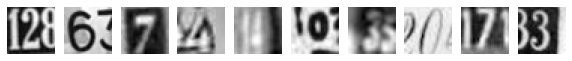

In [ ]:
#Visualizing the 10 images in the dataset and printing its corresponding labels

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    print('label for each of the below image in the order: %s' % ((y_train[i])))
plt.show()

In [ ]:
# Flattening out the X data/Reshaping X data to make it Neural Network ready

X_train = X_train.reshape(42000, 32*32)
X_val= X_val.reshape(X_val.shape[0], 32*32)
X_test = X_test.reshape(X_test.shape[0], 32*32)

print(f'Shape of X_train is {X_train.shape}')
print(f'Shape of X_val is {X_val.shape}')
print(f'Shape of X_test is {X_test.shape}')

Shape of X_train is (42000, 1024)
Shape of X_val is (60000, 1024)
Shape of X_test is (18000, 1024)


In [ ]:
# Normalising the image pixels

X_test = pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)

X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
X_val_scaled = X_val.apply(zscore)

In [ ]:
print('After Normalization \n')

print(f'Min value is : \n\n{X_train_scaled.min()} \n')
print(f'Max value is : \n\n{X_train_scaled.max()}')

After Normalization 

Min value is : 

0      -2.158478
1      -2.164138
2      -2.146480
3      -2.157187
4      -2.170026
          ...   
1019   -2.119158
1020   -2.192968
1021   -2.195509
1022   -2.180609
1023   -2.174923
Length: 1024, dtype: float32 

Max value is : 

0       2.746893
1       2.746240
2       2.738500
3       2.730738
4       2.718849
          ...   
1019    2.749752
1020    2.769468
1021    2.783767
1022    2.790589
1023    2.782456
Length: 1024, dtype: float32


In [ ]:
# Transforming the dataset labels into format accepted by the Neural Network

y_train_new = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_val_new= tf.keras.utils.to_categorical(y_val,num_classes=10)
y_test_new= tf.keras.utils.to_categorical(y_test, num_classes=10)

print(f'first row of the target variable in training set {y_train_new[0]}')

first row of the target variable in training set [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(type(y_train))
print(type(y_test))

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_val = pd.DataFrame(y_val)

y = y_train.append(y_val)
y = y.append(y_test)

y.shape

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(120000, 1)

In [ ]:
print (f'List of classes in the Dataset : \n\n{y.value_counts()}\n\n')
print (f'Total number of classes in the Dataset : \n\n{y.nunique()}')

List of classes in the Dataset : 

0    12000
1    12000
2    12000
3    12000
4    12000
5    12000
6    12000
7    12000
8    12000
9    12000
dtype: int64


Total number of classes in the Dataset : 

0    10
dtype: int64


In [ ]:
# Designing Neural Network  Architechture and training the neural network with the training dataset

def neural_network_model():

  backend.clear_session()
  #Fixing the seed for random number generators so that we can ensure we receive the same output everytime
  random.seed(42)
  tf.random.set_seed(42)

  model= Sequential()
  model.add(BatchNormalization(input_shape=((1024,)))) 
  model.add(Dense(256,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  
  # compile the model
  
  sgd= optimizers.Adam(lr =1e-3)
  model.compile(loss=losses.categorical_crossentropy,optimizer=sgd,metrics=['accuracy'])
  return model

# Build the model
model = neural_network_model()

# Fit the model
history = model.fit(X_train_scaled,y_train_new, validation_data=(X_val_scaled,y_val_new),epochs=30,batch_size=200,verbose=2)
scores= model.evaluate(X_test_scaled,y_test_new,verbose=0)
print(f"Error:%.2f%% %(100-scores[1]*100) \n")
print('Validation Accuracy :', scores[1])

Epoch 1/30
210/210 - 5s - loss: 1.4925 - accuracy: 0.5094 - val_loss: 1.0386 - val_accuracy: 0.6751 - 5s/epoch - 24ms/step
Epoch 2/30
210/210 - 4s - loss: 0.9282 - accuracy: 0.7131 - val_loss: 0.8034 - val_accuracy: 0.7549 - 4s/epoch - 18ms/step
Epoch 3/30
210/210 - 4s - loss: 0.7901 - accuracy: 0.7570 - val_loss: 0.7174 - val_accuracy: 0.7796 - 4s/epoch - 18ms/step
Epoch 4/30
210/210 - 4s - loss: 0.6970 - accuracy: 0.7872 - val_loss: 0.6534 - val_accuracy: 0.8020 - 4s/epoch - 19ms/step
Epoch 5/30
210/210 - 4s - loss: 0.6342 - accuracy: 0.8049 - val_loss: 0.6029 - val_accuracy: 0.8177 - 4s/epoch - 19ms/step
Epoch 6/30
210/210 - 4s - loss: 0.5965 - accuracy: 0.8171 - val_loss: 0.5874 - val_accuracy: 0.8240 - 4s/epoch - 18ms/step
Epoch 7/30
210/210 - 4s - loss: 0.5616 - accuracy: 0.8295 - val_loss: 0.5406 - val_accuracy: 0.8378 - 4s/epoch - 18ms/step
Epoch 8/30
210/210 - 4s - loss: 0.5294 - accuracy: 0.8373 - val_loss: 0.5194 - val_accuracy: 0.8462 - 4s/epoch - 19ms/step
Epoch 9/30
210/2

In [ ]:
# Probability output for the first sample data displayed

y_test_pred = model.predict(X_test_scaled)
y_test_pred[0]

array([0.14542267, 0.59481084, 0.02752872, 0.00149833, 0.06639165,
       0.0125886 , 0.02012391, 0.04974889, 0.00275022, 0.07913619],
      dtype=float32)

In [ ]:
# As our outputs are probabilities so we will try to extract the output class from these probablities by getting the maximum value

y_test_pred_final = []
for i in y_test_pred:
  y_test_pred_final.append(np.argmax(i))

# Output class of sample data input 3

y_test_pred_final[3]

9

In [ ]:
# MODEL PERFORMANCE EVALUATION

# Classification Report for the model

print(classification_report(y_test, y_test_pred_final))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1814
           1       0.81      0.87      0.84      1828
           2       0.86      0.84      0.85      1803
           3       0.81      0.78      0.80      1719
           4       0.89      0.86      0.88      1812
           5       0.83      0.83      0.83      1768
           6       0.85      0.82      0.84      1832
           7       0.89      0.88      0.88      1808
           8       0.83      0.79      0.81      1812
           9       0.83      0.82      0.82      1804

    accuracy                           0.84     18000
   macro avg       0.84      0.84      0.84     18000
weighted avg       0.84      0.84      0.84     18000



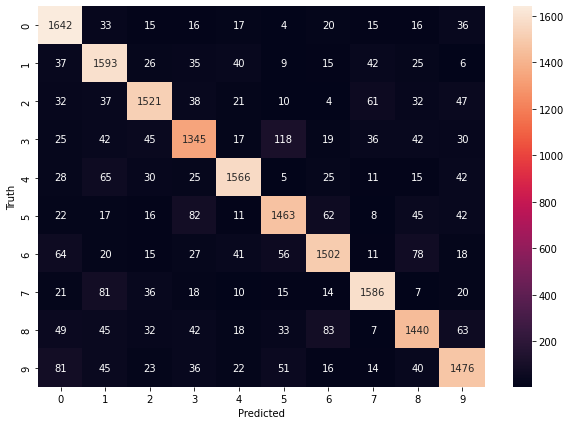

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test,y_test_pred_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Inference from Above shown Performance Metrics
-------------------------------------------------

1. Recall is the major deciding metric here. As also evident from the classification report and Confustion Matrix. The digits classified accurately majority of the times are 0,1,7 and 4 with their recall values as 91%, 87%, 88%, 86% respectively.

In [ ]:
# Misclassified Images

index = 0
misclassified_images = []
for label, predict in zip(y_test, y_test_pred_final):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print("List of Misclassified Images :", misclassified_images)
print("Total number of misclassified images :", len(misclassified_images))

List of Misclassified Images : [0]
Total number of misclassified images : 1


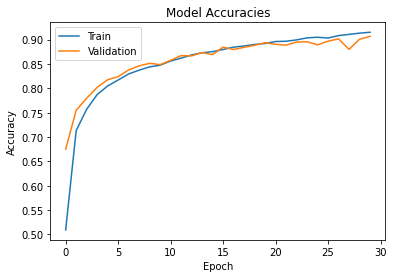

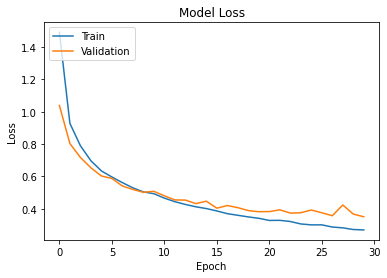

In [ ]:
# Epoch Vs Accuracy/Loss Plots 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Inference from the Validation and Train Accuracies/Loss Curves
---------------------------------------------------------------
1. The convergence seen between valiadation and train accuracies are good enough with best convergence seen between 10 and 20 epochs. Shows signs of overfit post 20 epochs

2. The loss curves converge between 8 and 12 epochs but starts to diverge later, with validation loss going higher than the Train loss, which shows that the model can be tuned to improve the performance

In [ ]:
%%shell
jupyter nbconvert --to html /content/Neural_Networks_Project.ipynb

[NbConvertApp] Converting notebook /content/Neural_Networks_Project.ipynb to html
[NbConvertApp] Writing 1987254 bytes to /content/Neural_Networks_Project.html
